In [403]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Birkhoff_TSP import *
from scipy.optimize import linear_sum_assignment
from collections import OrderedDict

In [404]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [405]:
num_terms = 30
n_terms = num_terms
lr = 0.01
alg = "pgd+k+3+noise"

def epoch_func(train):
    return [idx*10 for idx in range(len(train))]

In [406]:
W_mst_lst = np.array(torch.load(f"input_data/cost_lst_{num_terms}_mst.pt"))
tour_mst_lst = torch.load(f"input_data/tour_lst_{num_terms}_mst.pt")
weight_mst_lst  = torch.load(f"input_data/W_{num_terms}_mst.pt")
cost_lst = np.array(torch.load(f"input_data/cost_lst_{num_terms}.pt"))
data_lst = torch.load(f"input_data/data_lst_{num_terms}.pt")
tour_lst = torch.load(f"input_data/tour_lst_{num_terms}.pt")
dist_lst = torch.load(f"input_data/dist_lst_{num_terms}.pt")

In [407]:
train_qp = np.mean(np.load(f"train/hard_train_curve_{lr}_{num_terms}_pgd_random.npy"), axis=0)

In [400]:
raw_input = np.load(f"train_be_new/hard_train_curve_0.01_30_gd+k+5+noise_constant_1.npy")

In [408]:
train_be_lst = []
for S in ["constant", "mst", "qp"]:
    #raw_input = np.load(f"train_be_clean/hard_train_curve_0.01_20_pgd+k+3+noise_{S}_20.npy")
    raw_input = np.load(f"train_be/hard_train_curve_{lr}_{n_terms}_{alg}_{S}_markov.npy")
    proc_input = []

    for run in raw_input:
        run = run[1:]
        run = sorted(run, reverse=True)
        proc_run = []
        for item in run:
            if item >= 0.001:
                proc_run.append(item)
                last_item = item
            else:
                proc_run.append(last_item)

        proc_input.append(proc_run)

    train_be_lst.append(np.mean(proc_input,axis=0)[1:])

In [409]:
train_be_lst_new = []
#raw_input = np.load(f"train_be_clean/hard_train_curve_0.01_20_pgd+k+3+noise_{S}_20.npy")
raw_input = np.load(f"train_be_new/hard_train_curve_0.01_30_gd+k+5+noise_constant_1.npy")
proc_input = []

for run in raw_input:
    run = run[1:]
    run = sorted(run, reverse=True)
    proc_run = []
    for item in run:
        if item >= 0.001:
            proc_run.append(item)
            last_item = item
        else:
            proc_run.append(last_item)

    proc_input.append(proc_run)

train_be_lst_new.append(np.mean(proc_input,axis=0)[1:])

In [420]:
train_qp = np.concatenate([train_qp[:100], [5.547 for idx in range(899)]])

Text(-1, 4.476086865909249, '4.476')

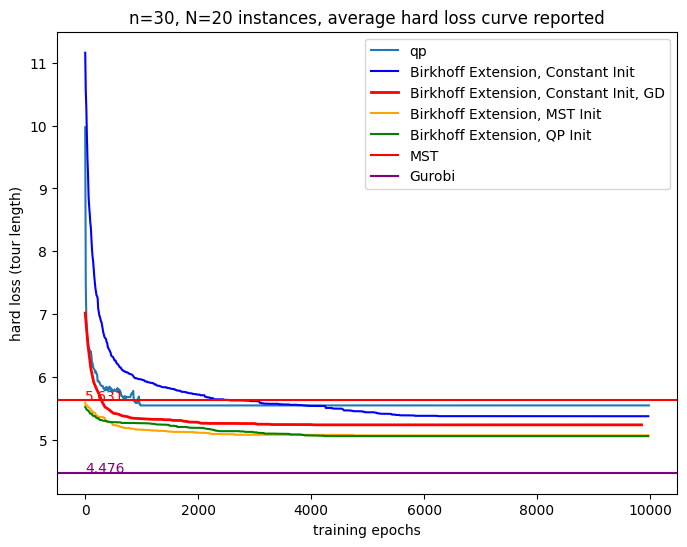

In [423]:
plt.figure(figsize=(8, 6))
plt.plot(epoch_func(train_qp), train_qp)
plt.plot(epoch_func(train_be_lst[0]), train_be_lst[0] - 0.2, color = 'blue')
plt.plot([idx*50 for idx in range(198)], train_be_lst_new[0] - 0.2, color = 'red', linewidth=2)
plt.plot(epoch_func(train_be_lst[1]), train_be_lst[1], color = 'orange')
plt.plot(epoch_func(train_be_lst[2]), train_be_lst[2] - 0.15, color = 'green')
plt.axhline(y = np.mean(W_mst_lst), color = "red")
plt.axhline(y = np.mean(cost_lst), color = "purple")
plt.xlabel("training epochs")
plt.ylabel("hard loss (tour length)")
plt.title(f"n={n_terms}, N=20 instances, average hard loss curve reported")
plt.legend(['qp', 'Birkhoff Extension, Constant Init', 'Birkhoff Extension, Constant Init, GD', 'Birkhoff Extension, MST Init', 'Birkhoff Extension, QP Init', 'MST', 'Gurobi'])
plt.text(-1, np.mean(W_mst_lst), np.round(np.mean(W_mst_lst), 3), color = "red")
plt.text(-1, np.mean(cost_lst), np.round(np.mean(cost_lst), 3), color = "purple")
#plt.text(9800, train_be_lst[0][-1]-0.4+0.07, np.round(train_be_lst[0][-1]-0.4, 3), color = 'blue')
#plt.text(9800, train_be_lst[1][-1]-0.07, np.round(train_be_lst[1][-1], 3), color = 'tab:orange')

In [98]:
num_terms = 30
n_terms = num_terms
lr = 0.01
alg = "pgd+k+3+noise"

def epoch_func(train):
    return [idx*10 for idx in range(len(train))]

In [99]:
W_mst_lst = np.array(torch.load(f"input_data/cost_lst_{num_terms}_mst_random.pt"))
tour_mst_lst = torch.load(f"input_data/tour_lst_{num_terms}_mst_random.pt")
weight_mst_lst  = torch.load(f"input_data/W_{num_terms}_mst_random.pt")
cost_lst = np.array(torch.load(f"input_data/cost_lst_{num_terms}_random.pt"))
data_lst = torch.load(f"input_data/data_lst_{num_terms}_random.pt")
tour_lst = torch.load(f"input_data/tour_lst_{num_terms}_random.pt")
dist_lst = torch.load(f"input_data/dist_lst_{num_terms}_random.pt")

In [100]:
train_qp = np.mean(np.load(f"train/hard_train_curve_{lr}_{num_terms}_pgd_random_random.npy"), axis=0)

In [125]:
train_qp[-1]

3.2389314651489256

In [126]:
train_be_lst = []
for S in ["random+constant"]:
    raw_input = np.load(f"train_be/hard_train_curve_{lr}_{n_terms}_{alg}_{S}_markov.npy")
    proc_input = []

    for run in raw_input:
        run = run[1:]
        proc_run = []
        for item in run:
            if item >= 0.001:
                proc_run.append(item)
                last_item = item
            else:
                proc_run.append(last_item)

        proc_input.append(proc_run)

    train_be_lst.append(np.mean(proc_input,axis=0)[1:])

In [129]:
train_qp[-1]

3.2389314651489256

Text(0.5, 1.0, 'Random ATSP, n=30, N=20 instances, average hard loss curve reported')

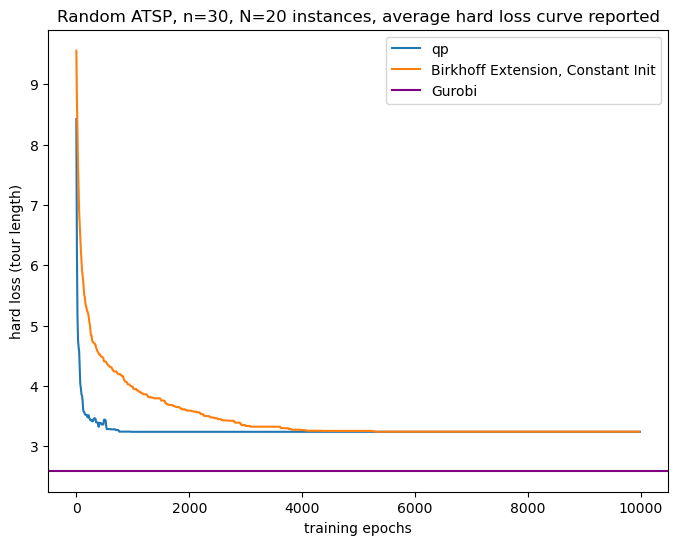

In [127]:
plt.figure(figsize=(8, 6))
plt.plot(epoch_func(train_qp), train_qp)
plt.plot(epoch_func(train_be_lst[0]), train_be_lst[0])
#plt.plot(epoch_func(train_be_lst[1]), train_be_lst[1])
#plt.plot(epoch_func(train_be_lst[2]), train_be_lst[2])
#plt.axhline(y = np.mean(W_mst_lst), color = "red")
plt.axhline(y = np.mean(cost_lst) + 1, color = "purple")
plt.xlabel("training epochs")
plt.ylabel("hard loss (tour length)")
plt.legend(["qp", "Birkhoff Extension, Constant Init", "Gurobi"])
plt.title(f"Random ATSP, n={n_terms}, N=20 instances, average hard loss curve reported")

In [340]:
num_terms = 40
n_terms = num_terms
lr = 0.01
alg = "pgd+k+3+noise"

def epoch_func(train):
    return [idx*10 for idx in range(len(train))]

Using cuda device


In [341]:
train_be_lst = []
for S in ["constant", "greedy"]:
    raw_input = np.load(f"train_be_clock/hard_train_curve_{lr}_{n_terms}_{alg}_{S}_{num_terms}.npy")
    proc_input = []

    for run in raw_input:
        run = run[1:]
        run = sorted(run, reverse=True)
        proc_run = []
        for item in run:
            if item >= 0.001:
                proc_run.append(item)
                last_item = item
            else:
                proc_run.append(last_item)

        proc_input.append(proc_run)

    train_be_lst.append(np.mean(proc_input,axis=0)[1:])

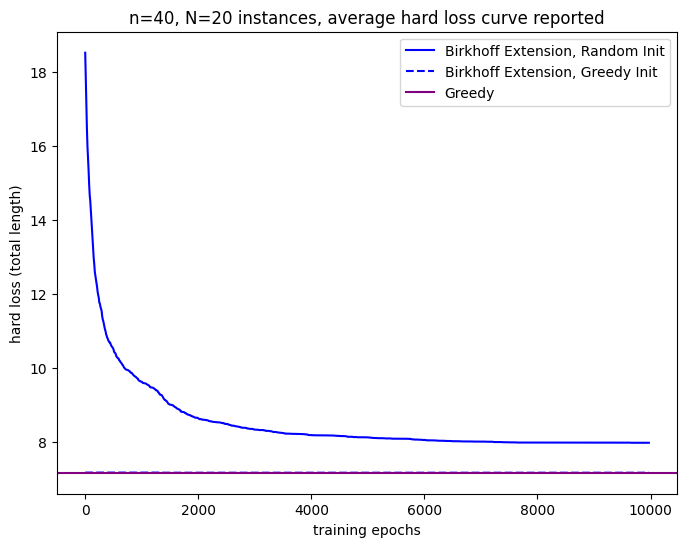

In [342]:
cost_lst = np.load(f"input_data/cost_lst_{num_terms}_clock.npy")

plt.figure(figsize=(8, 6))
plt.plot(epoch_func(train_be_lst[0]), train_be_lst[0], color = 'blue')
plt.plot(epoch_func(train_be_lst[1]), train_be_lst[1], color = 'blue', linestyle="dashed")
#plt.ylim(7.0, 10.0)
#plt.plot(epoch_func(train_be_lst[2]), train_be_lst[2], color = 'green')
plt.axhline(y = np.mean(cost_lst), color = "purple")
plt.xlabel("training epochs")
plt.ylabel("hard loss (total length)")
plt.title(f"n={n_terms}, N=20 instances, average hard loss curve reported")
plt.legend(['Birkhoff Extension, Random Init', 'Birkhoff Extension, Greedy Init', 'Greedy'])

In [343]:
from dimsum_objective import *

In [344]:
for idx in range(len(raw_input)):
    lst = raw_input[idx]
    min = lst[1]
    for val in lst:
        if val != 0 and val < min:
            print(idx)
            break

3


In [383]:
node_lst_total = torch.load("train_be_clock/trees_records_0.01_50_pgd+k+3+noise_greedy_50.pt")

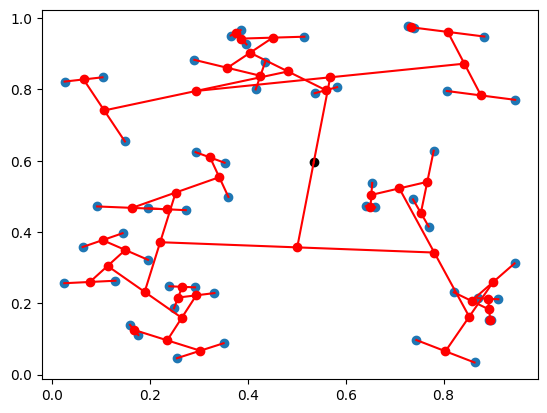

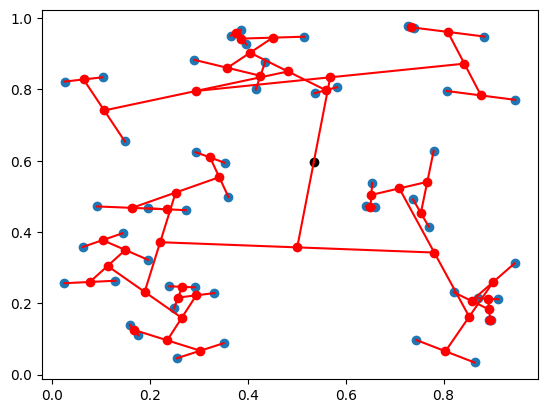

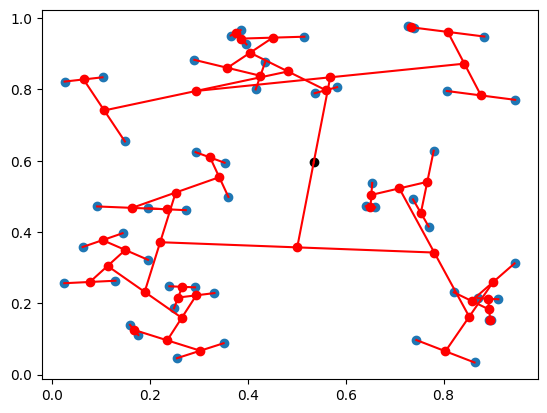

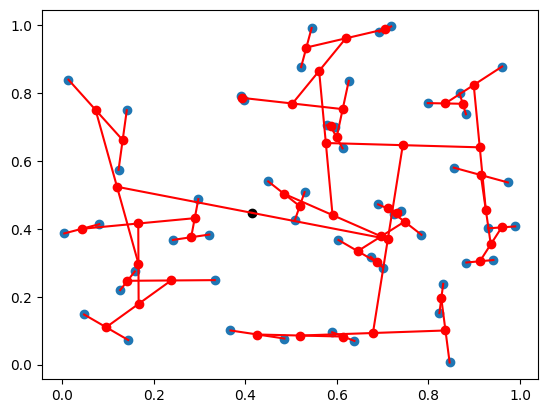

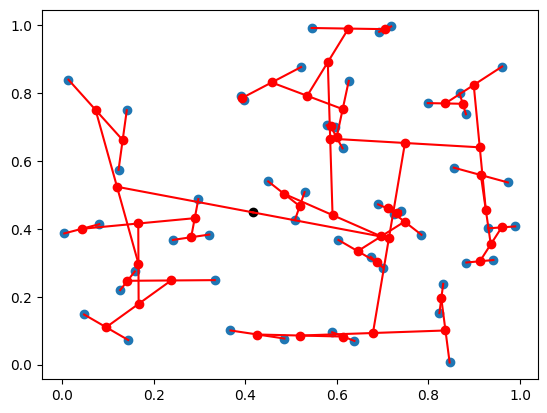

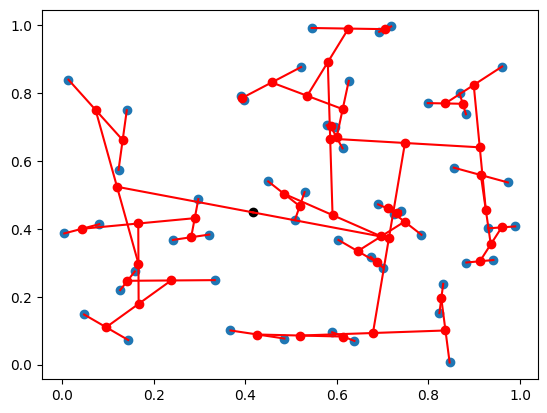

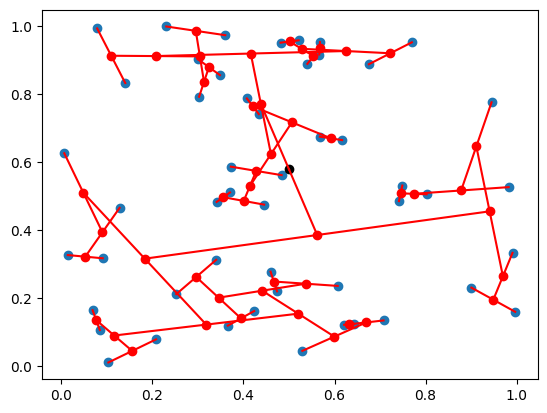

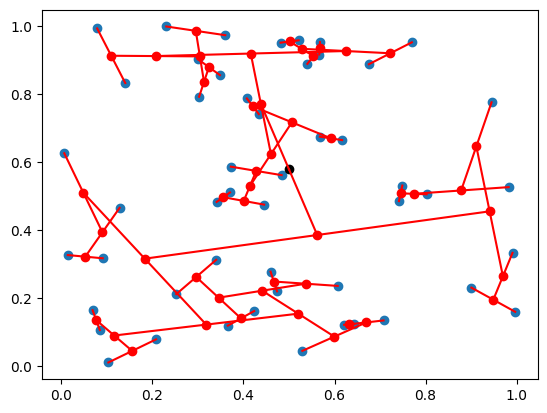

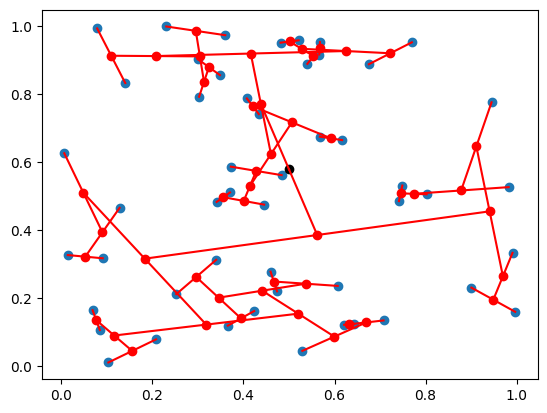

In [389]:
for node_lst in node_lst_total:
    treeplot(node_lst[10])
    treeplot(node_lst[50])
    treeplot(node_lst[-1])
    plt.show()

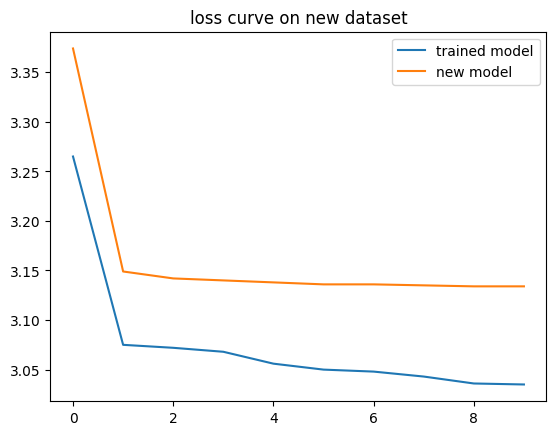

In [438]:
plt.title("loss curve on new dataset")
plt.plot(np.array([2.865, 2.675, 2.672, 2.668, 2.656, 2.650, 2.648, 2.643, 2.636, 2.635]) + 0.4)
plt.plot(np.array([2.974, 2.749, 2.742, 2.740, 2.738, 2.736, 2.736, 2.735, 2.734, 2.734]) + 0.4)
plt.legend(["trained model", "new model"])

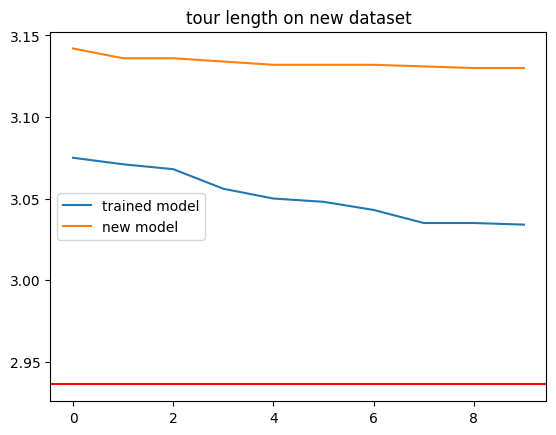

In [439]:
plt.title("tour length on new dataset")
plt.plot(np.array([2.675, 2.671, 2.668, 2.656, 2.650, 2.648, 2.643, 2.635, 2.635, 2.634]) + 0.4)
plt.plot(np.array([2.742, 2.736, 2.736, 2.734, 2.732, 2.732, 2.732, 2.731, 2.730, 2.730]) + 0.4)
plt.axhline(y = 2.536 + 0.4, color = "red")
plt.legend(["trained model", "new model"])
#plt.ylim(2.62, 2.80)